Mall_Customer

- 출처 : https://www.kaggle.com/roshansharma/mall-customers-clustering-analysis/data

## 라이브러리 설치

In [1]:
# 기초 수학 계산을 위한 라이브러리
import numpy as np
import pandas as pd
from pandas import plotting

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# 상호적인 시각화를 위한 라이브러리 (=Plotly를 오프라인에서 사용하기 위한 라이브러리 import 및 환경 설정
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# 경로 라이브러리 
# import os
# print(os.listdir('../input/'))

## 데이터 불러오기 

In [2]:
data = pd.read_csv('Mall_Customers.csv')
dat = ff.create_table(data.head())

py.iplot(dat)

# py.plot()을 사용해 고유한 URL을 반환하고 선택적으로 url을 엽니다.
# py.iplot()을 사용해 주피터 노트북에 플롯을 표시합니다.

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
desc = ff.create_table(data.describe())
py.iplot(desc)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


전체적으로 결측치 값을 체크해봤지만 없다는 것을 알 수 있었다. 

In [6]:
data.isnull().any().any()

False

## 데이터 시각화

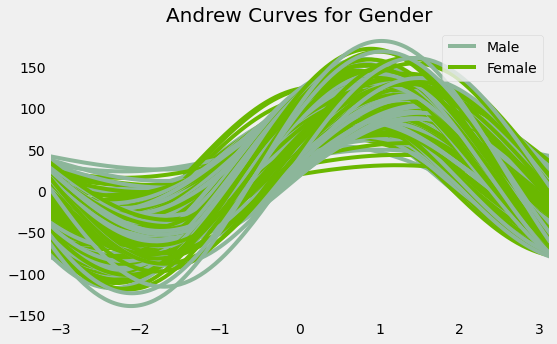

In [7]:
plt.rcParams['figure.figsize'] = (8, 5)

plotting.andrews_curves(data.drop('CustomerID', axis=1), 'Gender')
plt.title('Andrew Curves for Gender', fontsize = 20)
plt.show()

In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


앤드류 곡선은 평균, 거리(상수까지) 및 편차를 보존할 수 있는 것으로 나타났다. <br>
즉, 서로 가까운 기능으로 표현되는 앤드류 곡선은 해당 데이터 지점도 서로 근접함을 나타낸다.

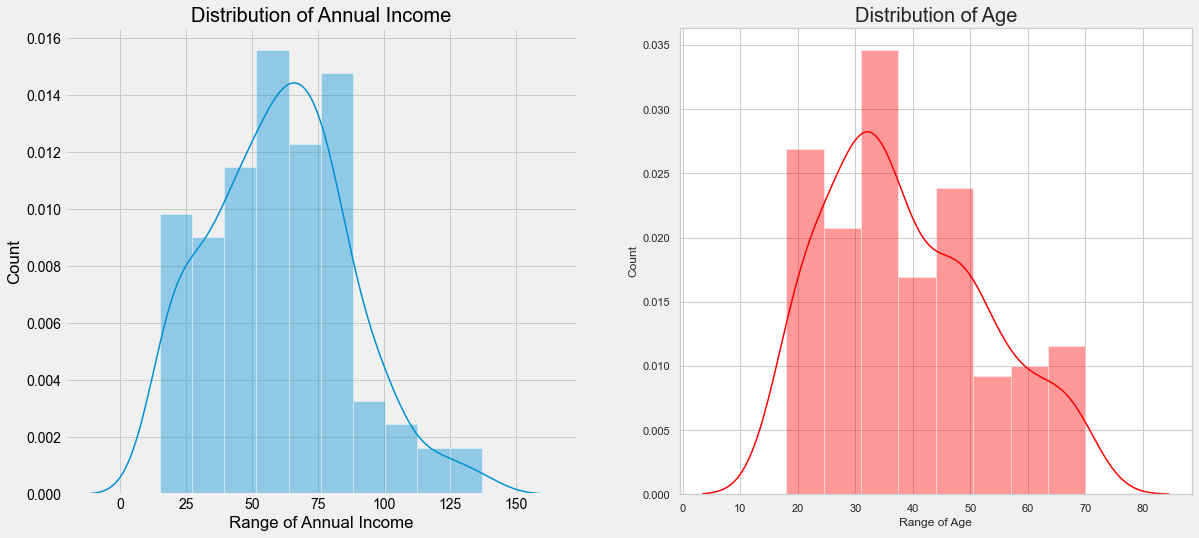

In [9]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18,8)

plt.subplot(1,2,1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize=20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

여기, 위의 그림에서 우리는 연간 소득과 연령의 분포 패턴을 볼 수 있다. <br>

- 연봉에 대한 추론 <br>
우리는 100달러 이상을 버는 사람이 거의 없다는 것을 추론할 수 있다. 
대부분의 사람들은 평균 50~75달러를 번다. 또한 최소 수입은 20달러 정도라고 말할 수 있다. <br>

- 고객에 대한 추론.<br>
해당 몰의 가장 단골손님은 30세에서 35세 사이다. <br>
반면에 노인들은 쇼핑몰에서 가장 덜 자주 방문한다. 젊은이들은 중년에 비해 수가 적다. 

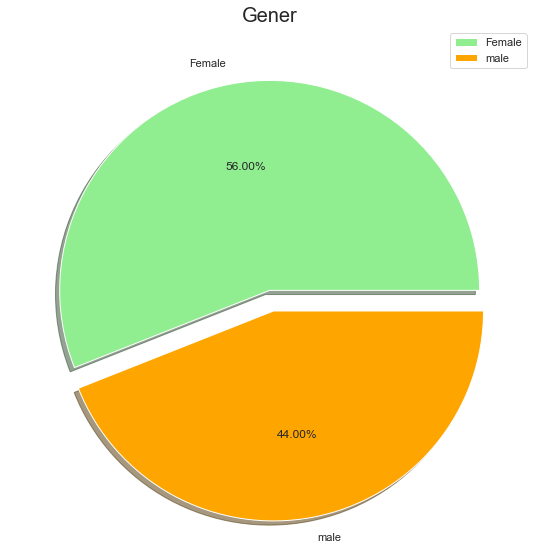

In [10]:
labels=['Female', 'male']
size = data['Gender'].value_counts()
colors = ['lightgreen', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9,9)
plt.pie(size, colors = colors, explode = explode, labels = labels,
        shadow=True, autopct = '%.2f%%')
plt.title('Gener', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

# explode는 부채꼴이 파이 차트의 중심에서 벗어나는 정도를 설정합니다.

쇼핑몰 내 성별 분포에 대해 설명하는 위의 원형 차트를 살펴보자. <br>
흥미롭게도, 여성의 비율이 56%로 선두에 있는 반면,<br>
            남성의 비율은 44%로 특히, 남성의 인구가 여성보다 상대적으로 높을때는 격차가 크다. 

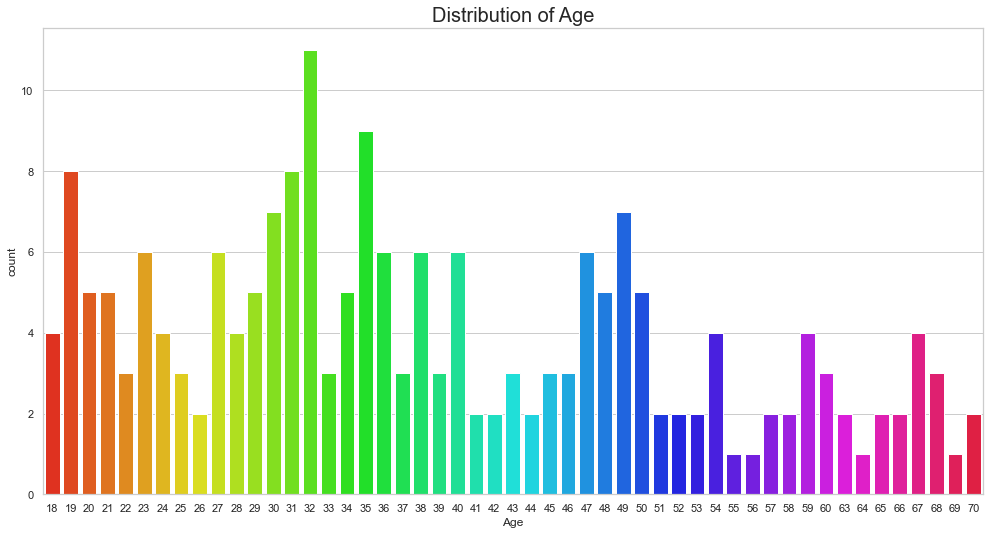

In [11]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(data['Age'], palette = 'hsv')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

이 그래프는 몰의 방문자 연령 그룹에 대한 보다 명확한 이해를 위해 몰 내 각 연령 그룹의 분포에 대한 대화형 차트를 보여줍니다.

위의 그래프를 보면, 27세에서 39세 사이의 연령이 매우 빈번하지만 뚜렷한 패턴이 없다는 것을 알 수 있습니다. 예를 들어, 노년층이 상대적으로 덜 빈번하다는 것을 알 수 있습니다. 흥미로운 사실, 쇼핑몰에는 18세와 67세의 방문객 수가 같다. 55세, 56세, 69세, 64세의 사람들은 쇼핑몰에서 매우 덜 자주 방문한다. 32세의 사람들이 몰에서 가장 자주 방문하는 사람들이다.

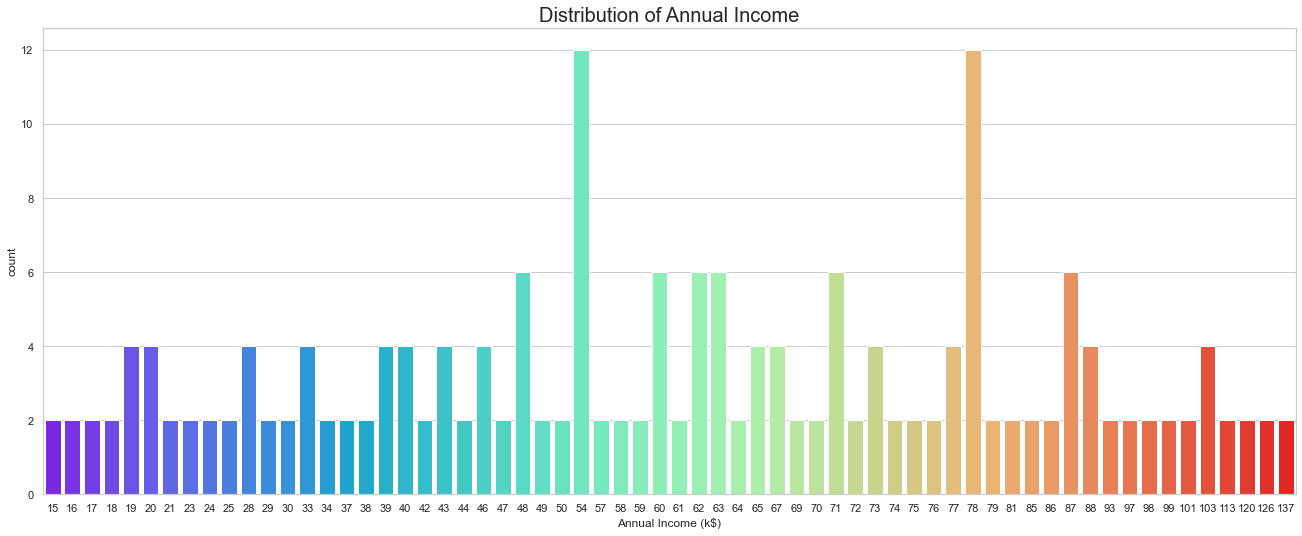

In [12]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

이것은 또한 각 소득 수준의 분배를 더 잘 설명하기 위한 차트입니다. 흥미로운 것은 이 쇼핑몰에 15 US 달러에서 137 K 달러 사이의 연간 수입과 매우 비슷한 주파수를 가진 고객들이 있다는 것입니다. 몰에는 연소득이 54달러 또는 78달러인 고객이 더 많습니다.

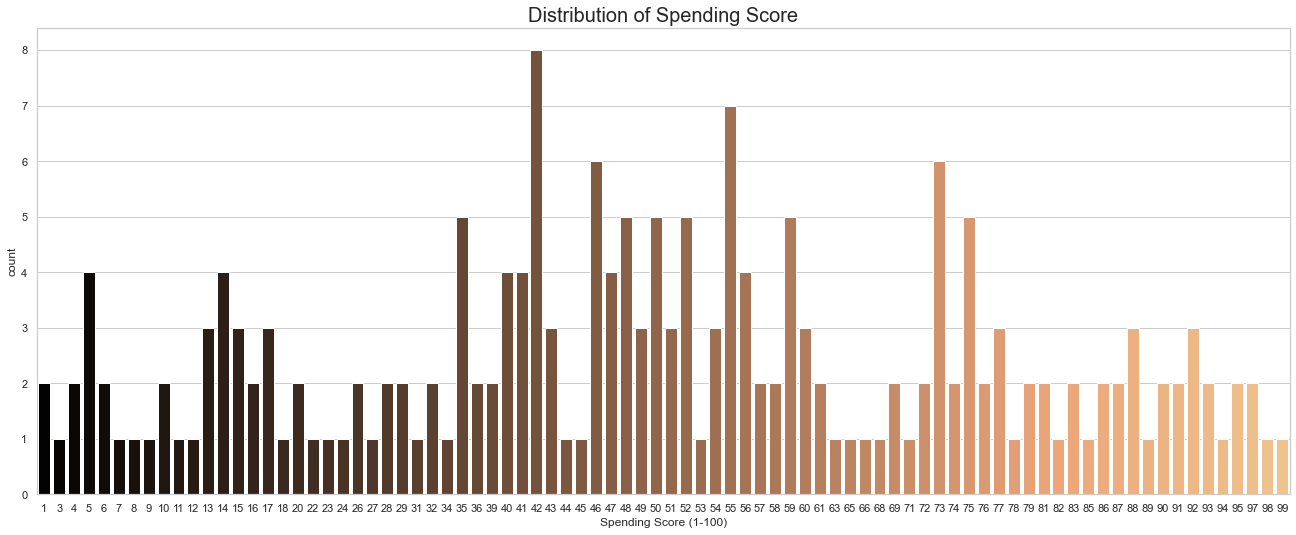

In [13]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.countplot(data['Spending Score (1-100)'], palette = 'copper')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

이 차트는 몰을 방문하는 고객의 지출 점수에 대한 직관력과 아이디어를 갖는 것이 매우 중요하기 때문에 몰의 관점에서 가장 중요한 차트입니다.

일반적으로 대부분의 고객이 지출 점수를 35~60점 범위로 알고 있다고 결론을 내릴 수 있습니다. 흥미로운 점은 제가 지출한 점수도 있고 99 지출 점수도 있다는 것입니다. 이는 몰에서 다양한 요구사항과 요구사항을 가진 다양한 고객의 요구를 충족한다는 것입니다.

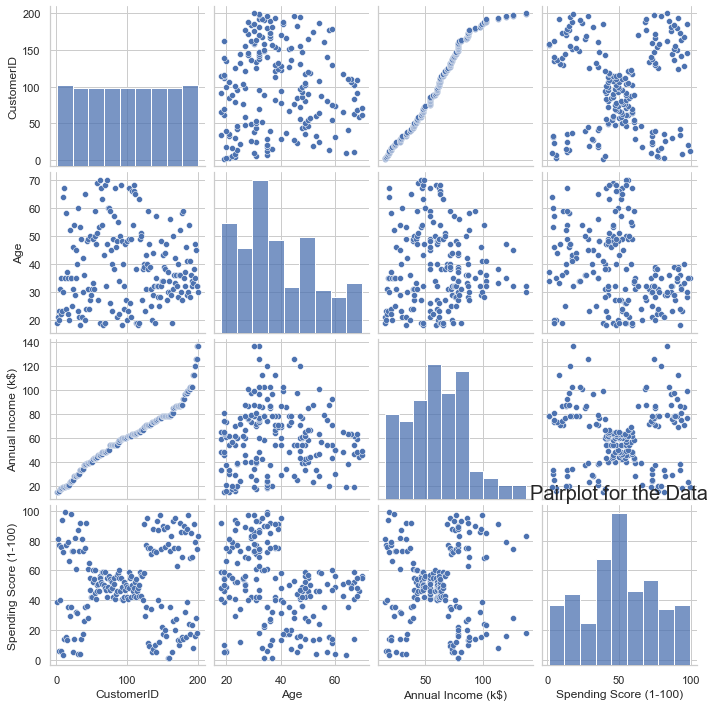

In [14]:
sns.pairplot(data)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

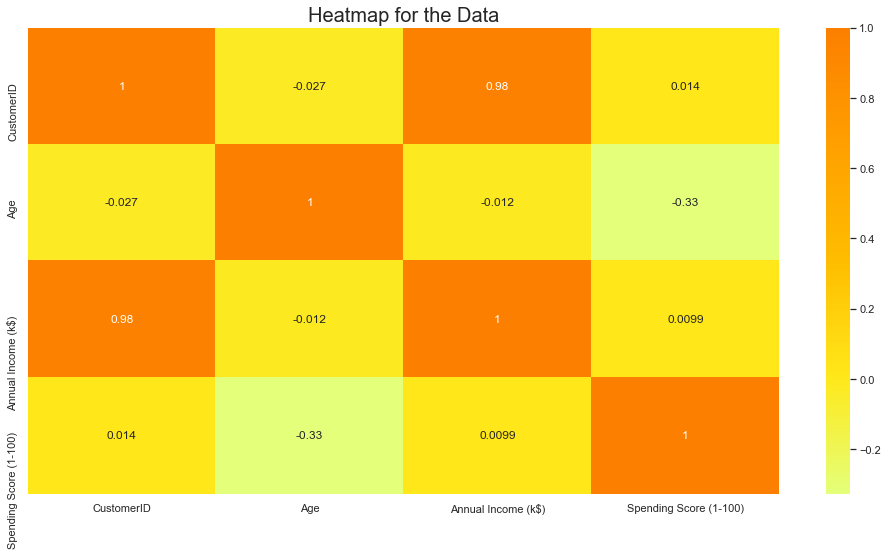

In [15]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

customerID와 연관 소득과의 진한 관계만 나타내고 있다. 불필요한 데이터 분석이었다. <br>
서로 상관관계가 없기 때문에 오히려 순수한 데이터 분석이 가능하다고 본다. 



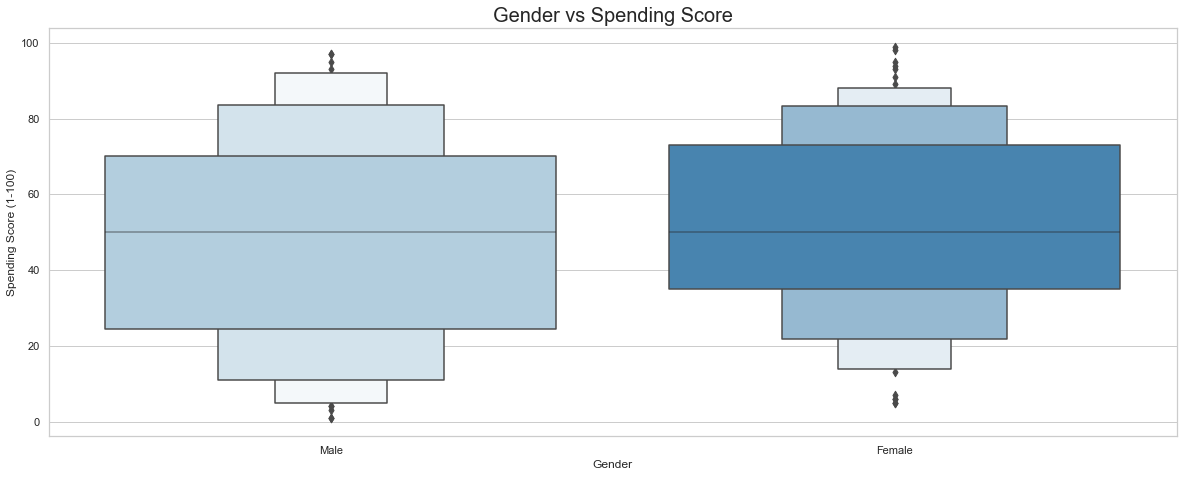

In [16]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(data['Gender'], data['Spending Score (1-100)'], palette = 'Blues') #데이터의 자세한 분포를 보여주기 위해 boxenplot을 사용
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

성별과 지출 점수 간의 이변 분석

대부분의 남성이 지출비용이 약 25-70만 달러인 반면, 여성은 약 35-75만 달러인 것으로 나타났다. <br>
그 말은 여성이 쇼핑의 선두주자라는 사실을 가리킨다. 

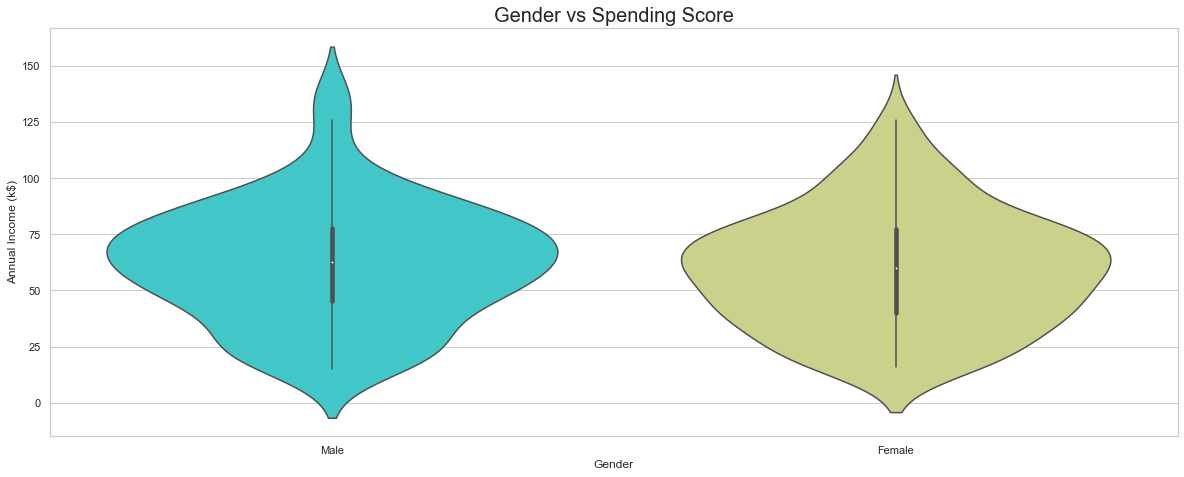

In [17]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(data['Gender'], data['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

성별과 연소득 간의 이변량 분석으로 다른 성별의 소득을 보다 잘 시각화한다. <br>
여성보다 더 많은 월급을 받는 남성들이 더 많다. 그러나 저연소득의 경우 남성과 여성의 수는 동일하다.

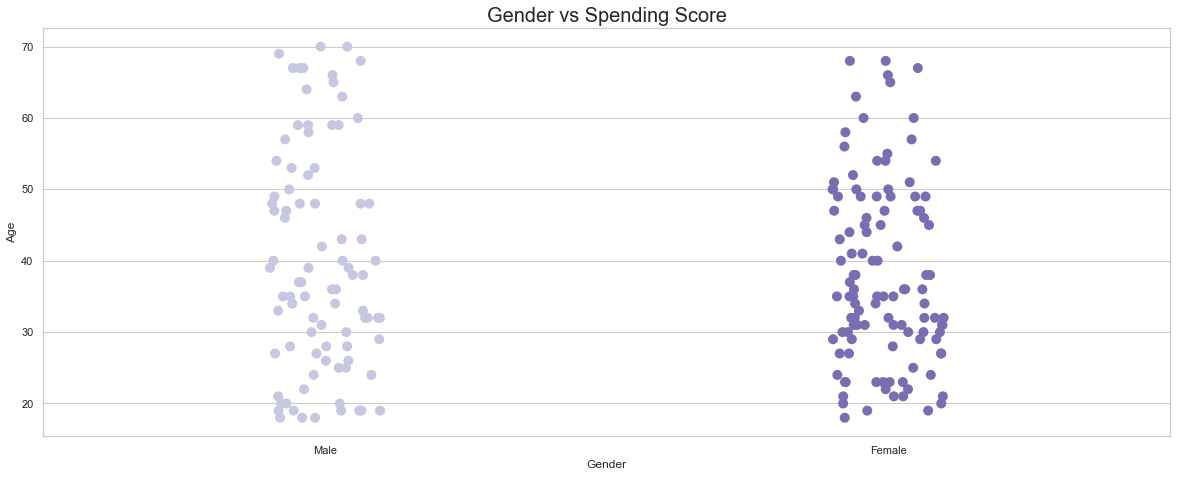

In [18]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(data['Gender'], data['Age'], palette = 'Purples', size = 10)
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

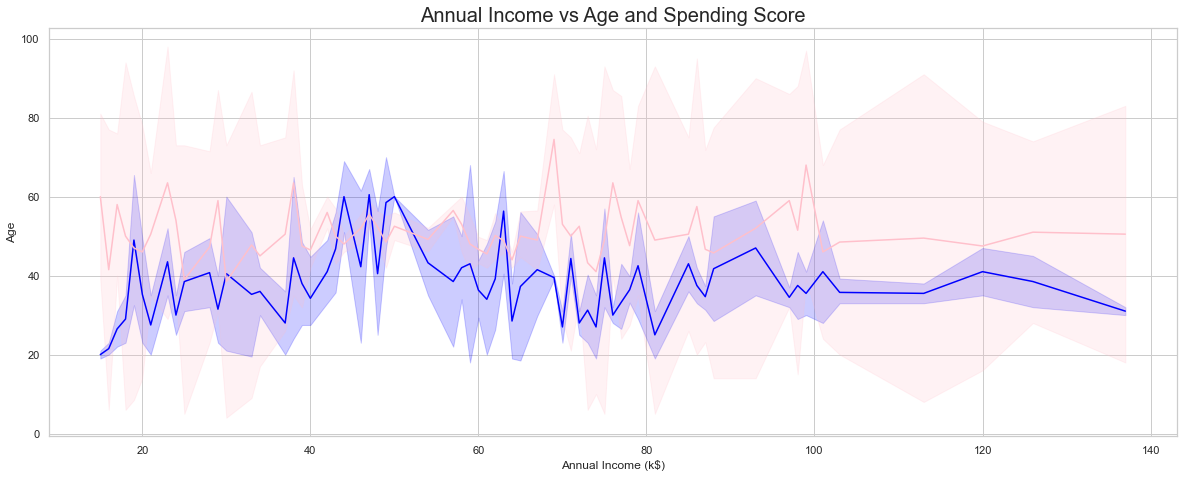

In [19]:
x = data['Annual Income (k$)']
y = data['Age']
z = data['Spending Score (1-100)']

sns.lineplot(x, y, color = 'blue')
sns.lineplot(x, z, color = 'pink')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

파란색 선으로 표시된 위의 연간 소득과 연령 사이의 플롯과 분홍색으로 표시된 연간 소득과 지출 점수 사이의 플롯. 에서는 연간 소득에 따라 연령 및 지출이 어떻게 달라지는지를 보여 줍니다.

## Clustering Analysis

In [20]:
x = data.iloc[:, [3,4]].values

In [21]:
print(x.shape)

(200, 2)


## Kmeans Algorithm

최적 군집 수를 찾는 엘보 방법

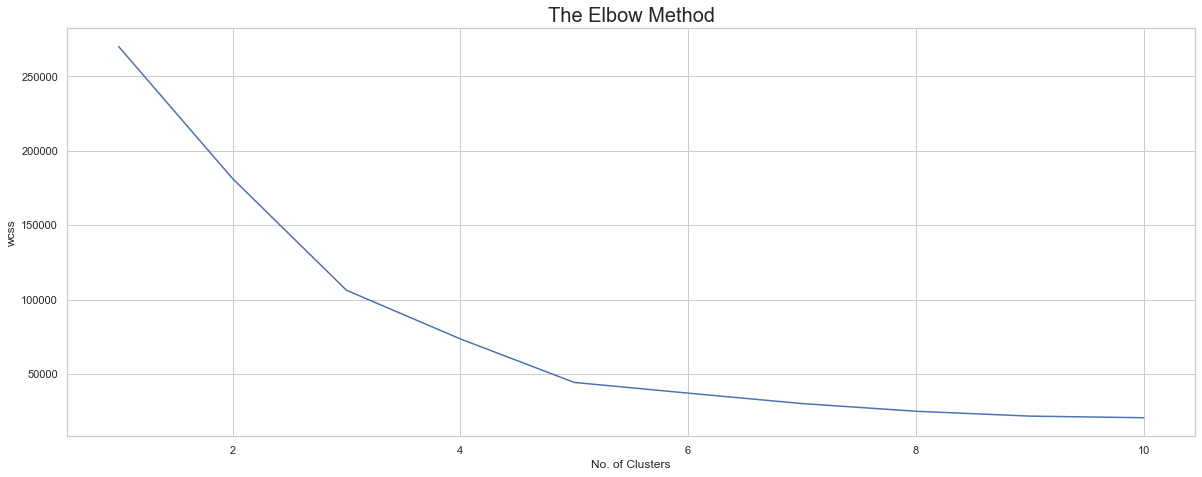

In [22]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

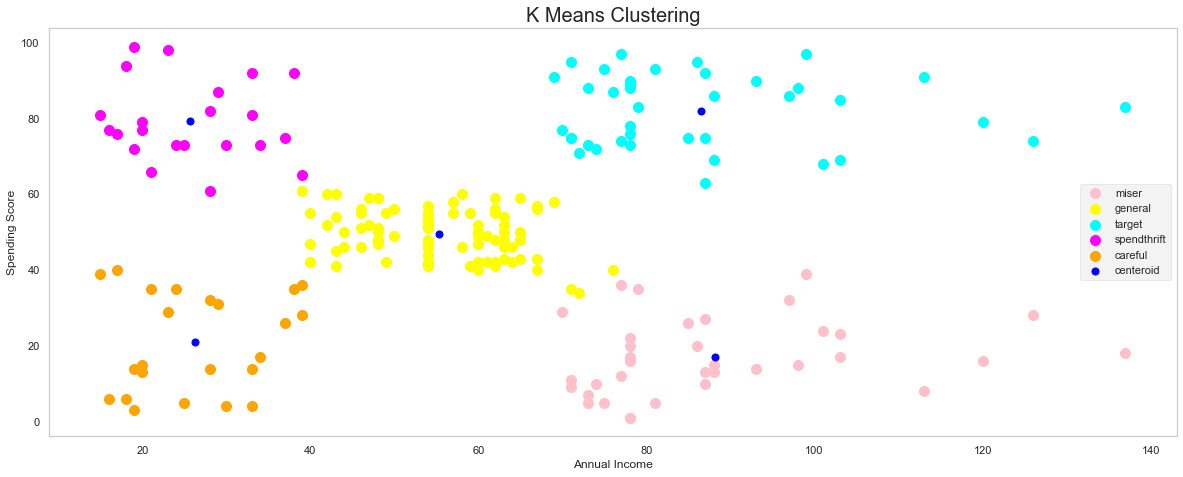

In [23]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

이 클러스터링 분석을 통해 Mall 내 고객의 다양한 부문에 대한 명확한 통찰력을 얻을 수 있습니다. <br>
연간 소득 및 지출 점수를 기준으로 Misper, General, Target, Suspthrift, Caured 등 5개 부문의 고객이 분명히 있으며,<br>
이는 쇼핑몰에서 고객의 부문을 결정하는 가장 좋은 요소/속성으로 알려져 있습니다. 

## Hierarchial Clustering(계층 클러스터링)

계층적 클러스터 분석이라고도 하는 계층적 클러스터링은 유사한 개체를 클러스터라는 그룹으로, 그룹화하는 알고리즘입니다. <br>
끝점은 클러스터 집합으로, 각 클러스터는 서로 구분되며 각 클러스터 내의 개체는 서로 대체로 유사합니다. 

- 덴드로그램을 사용하여 최적 군집수 찾기

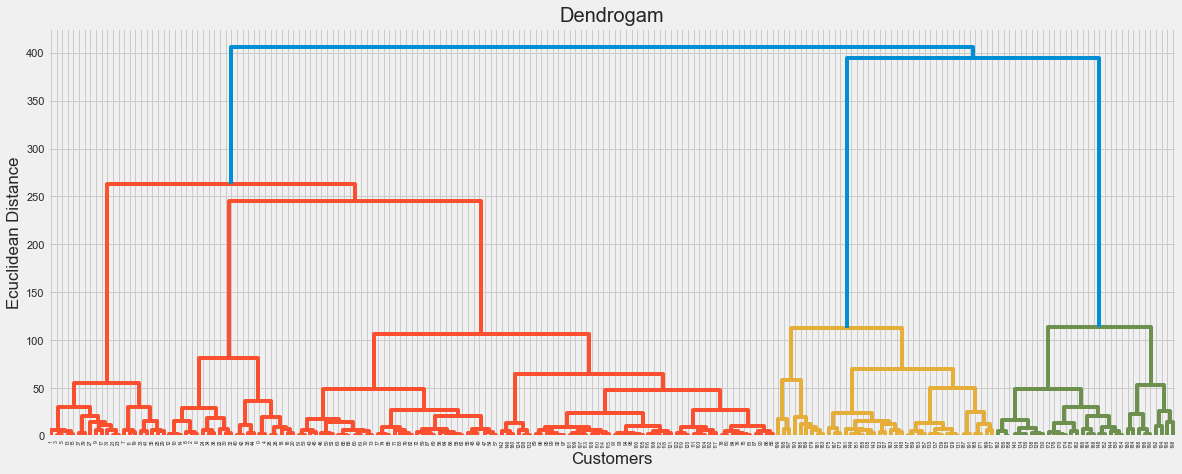

In [24]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

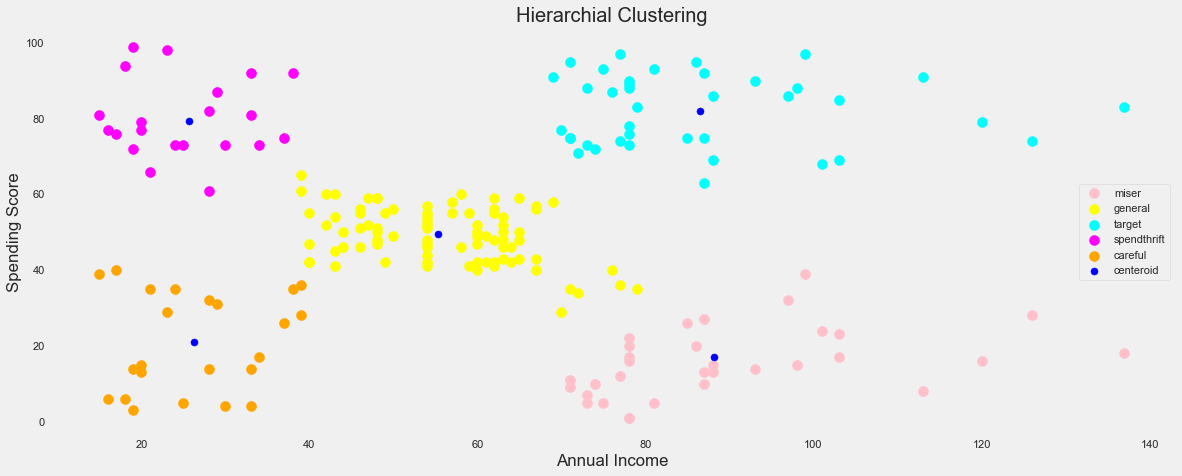

In [25]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

## K-means Algorithm

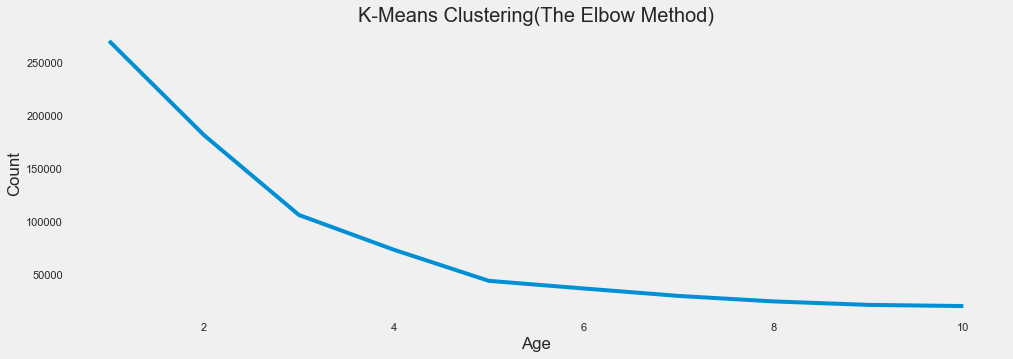

In [26]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15,5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

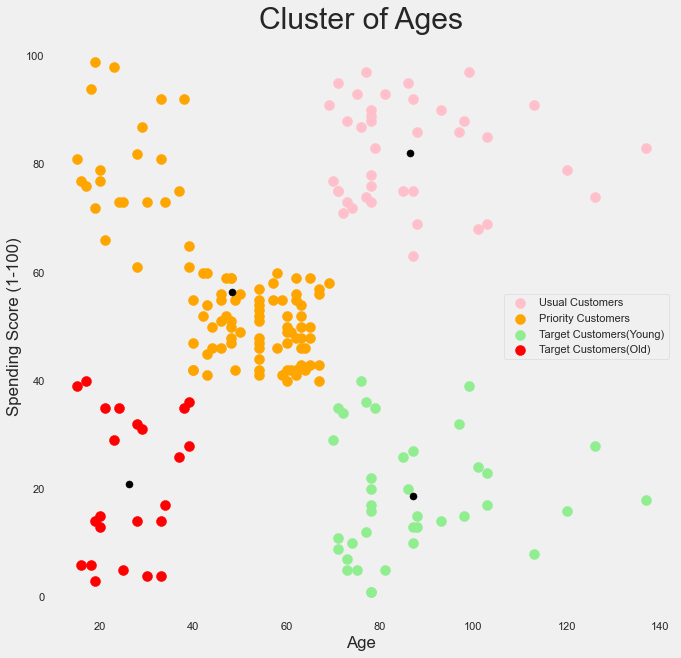

In [27]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

고객의 연령과 그에 상응하는 지출 점수에 대한 위의 클러스터링 그림을 보고 직관에 따라 저는 고객을 4가지 다른 범주,
즉 유주얼 고객, 우선 고객, 시니어 시민 대상 고객, 젊은 대상 고객으로 집계했습니다. 그런 다음 결과를 얻은 후에는 다양한 마케팅 전략과 정책을 수립하여 
몰에서 지출 점수를 최적화할 수 있습니다. 

In [28]:
x = data[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters =5, init = 'k-means++', max_iter = 300, n_init = 10, random_state=0)
km.fit(x)
labels = km.labels_
centroids = km.cluster_centers_

In [29]:
data['labels'] =  labels
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending Score (1-100)'],
    z= data['Annual Income (k$)'],
    mode='markers', #markers를 따로 표시한다. 
     marker=dict(  #marker는 색깔은 라벨들을 따르며, 사이즈는 10, 불투명도(opacity)
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]  # 3차원 산점도 그리는 함수인 (go.Scatter3d를 사용하여 trace1에 저장, 그것을 df에 저장)
layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict( #margin은 여백을 나타낸다. 
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(  #x축, y축, z축의 이름을 부여한다. 
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df) # 3차원 그래프 그리는 방법. 
py.iplot(fig)